In [ ]:
import pandas as pd

In [ ]:
import zipfile
import os

zip_file_path = "/content/Hackathon_data (1).zip"

# Directory to extract the contents of the zip file
extract_dir = "content/"

# Check if the extraction directory exists, if not, create it
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted files:")
for file in extracted_files:
    print(file)


Extracted files:
Hackathon_data


In [ ]:
!ls

 content  'Hackathon_data (1).zip'   sample_data


In [ ]:
df = pd.read_excel("/content/content/Hackathon_data/wind_power_data/air_temperature_2019.xlsx")

In [ ]:
df.head()

,DateTime,Air temperature | (°C)
0,2019-01-01 01:00:00.000,10.926
1,2019-01-01 02:00:00.000,9.919
2,2019-01-01 03:00:00.005,8.567
3,2019-01-01 04:00:00.010,7.877
4,2019-01-01 05:00:00.015,7.259


In [ ]:
df.shape

(8759, 2)

In [ ]:
df.isna().sum()

DateTime                  0
Air temperature | (°C)    0
dtype: int64

In [ ]:
df.columns

Index(['DateTime', 'Air temperature | (°C)'], dtype='object')

Summary Statistics:
count    8759.000000
mean       16.135669
std        10.016988
min        -9.060000
25%         8.387000
50%        17.536000
75%        23.716500
max        38.340000
Name: Air temperature | (°C), dtype: float64


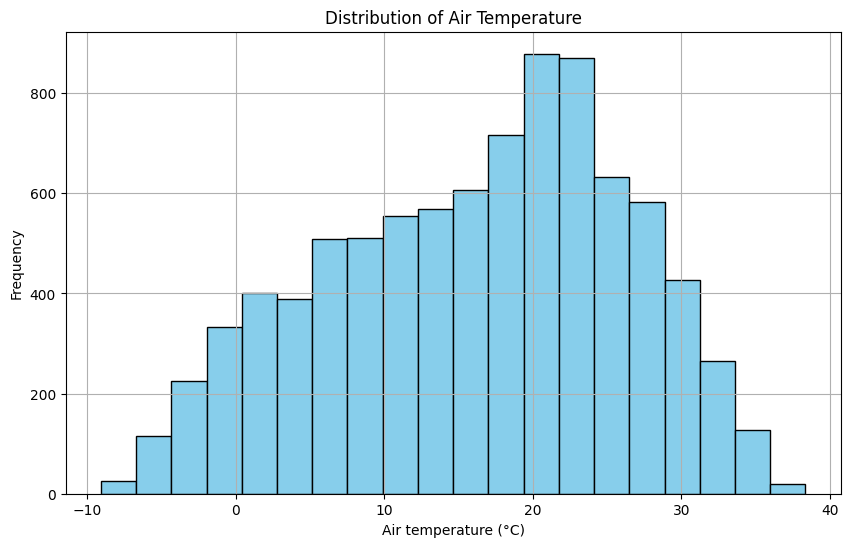

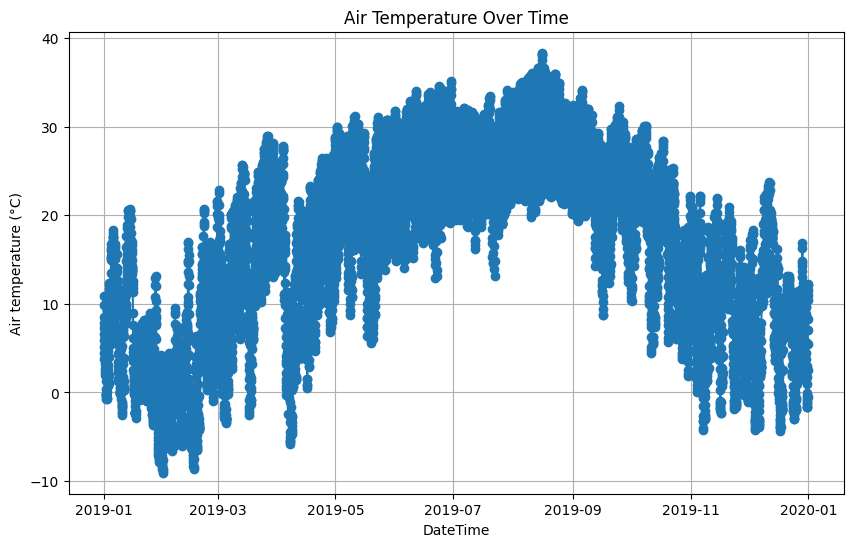

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the cleaned dataset

# Summary Statistics
summary_stats = df['Air temperature | (°C)'].describe()
print("Summary Statistics:")
print(summary_stats)

# Data Visualization
plt.figure(figsize=(10, 6))
plt.hist(df['Air temperature | (°C)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Air Temperature')
plt.xlabel('Air temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Air temperature | (°C)'], marker='o', linestyle='-')
plt.title('Air Temperature Over Time')
plt.xlabel('DateTime')
plt.ylabel('Air temperature (°C)')
plt.grid(True)
plt.show()

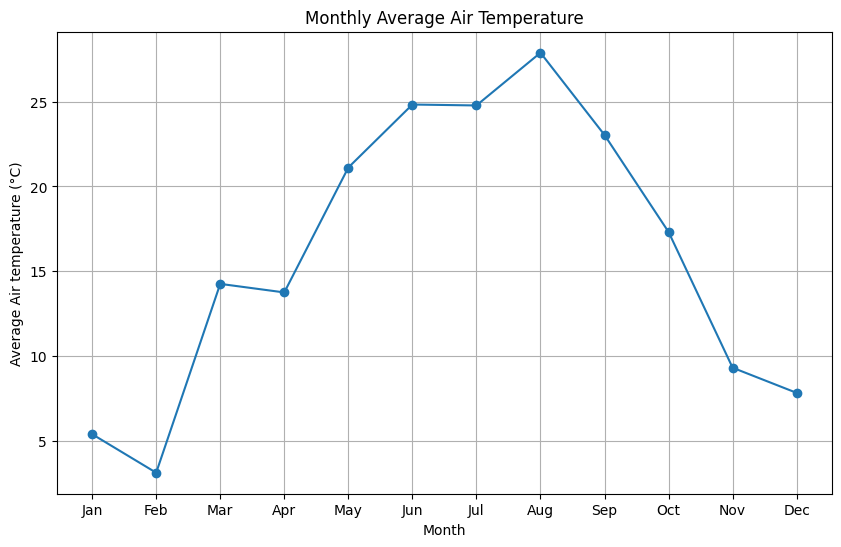

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df.set_index('DateTime', inplace=True)

df['Month'] = df.index.month

monthly_avg_temp = df.groupby('Month')['Air temperature | (°C)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-')
plt.title('Monthly Average Air Temperature')
plt.xlabel('Month')
plt.ylabel('Average Air temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()